In [53]:
# !pip install xgboost

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [55]:
data = pd.read_csv('dataset.csv')

In [56]:
data['Label'] = data['Label'].map({-1: 0, 0: 0, 1: 1})

In [57]:
data

,Url,Label,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,URL_Depth,...,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic
0,http://superuser.com/questions/862530/3-pin-cp...,0,-1,1,-1,-1,-1,-1,-1,3,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1
1,https://www.gov.uk/government/organisations/ci...,0,-1,1,-1,-1,-1,-1,-1,3,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1
2,http://emgn.com/tv/watch-24-people-making-stat...,0,-1,1,-1,-1,-1,-1,-1,2,...,0,-1,-1,-1,-1,-1,-1,-1,1,1
3,http://slashdot.org/story/14/08/01/1643234/ins...,0,-1,1,-1,-1,-1,-1,-1,6,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1
4,http://buzzfil.net/article/5391/animaux/15-ill...,0,-1,1,-1,-1,-1,-1,-1,4,...,0,-1,-1,-1,-1,-1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,https://yahoo-103496.weeblysite.com/,1,-1,-1,-1,-1,-1,1,-1,0,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
7996,https://laubros.com:2096/cpsess6807296530/3rdp...,1,-1,0,-1,-1,-1,-1,-1,3,...,-1,-1,-1,-1,-1,-1,1,1,1,1
7997,https://eejy91.webwave.dev/,1,-1,-1,-1,-1,-1,-1,-1,0,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
7998,https://w12netempresasbrdsco.rds.land/brdsconet12,1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1


In [58]:
data.columns

Index(['Url', 'Label', 'having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'URL_Depth', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic'],
      dtype='object')

In [59]:
data.size

224000

In [60]:
data.describe()

,Label,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,URL_Depth,Domain_registeration_length,...,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic
count,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.0,8000.0,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,0.500000,-0.998250,0.174375,-0.85250,-0.968000,-0.98075,-0.614000,-0.944125,2.108375,-0.047500,...,-0.908125,-0.992250,-0.889500,-1.0,-1.0,-0.999750,0.640500,-0.377500,-0.920000,0.037250
std,0.500031,0.059139,0.961163,0.52276,0.250966,0.19528,0.789355,0.270208,2.158695,0.998934,...,0.288867,0.124265,0.456964,0.0,0.0,0.022361,0.768006,0.926067,0.391943,0.999368
min,0.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.00000,-1.000000,-1.000000,0.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.00000,-1.000000,-1.000000,0.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.000000,1.000000,-1.000000,-1.000000,-1.000000
50%,0.500000,-1.000000,1.000000,-1.00000,-1.000000,-1.00000,-1.000000,-1.000000,2.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.000000,1.000000,-1.000000,-1.000000,1.000000
75%,1.000000,-1.000000,1.000000,-1.00000,-1.000000,-1.00000,-1.000000,-1.000000,3.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.000000,1.000000,1.000000,-1.000000,1.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,14.000000,1.000000,...,0.000000,1.000000,1.000000,-1.0,-1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Url                          8000 non-null   object
 1   Label                        8000 non-null   int64 
 2   having_IP_Address            8000 non-null   int64 
 3   URL_Length                   8000 non-null   int64 
 4   Shortining_Service           8000 non-null   int64 
 5   having_At_Symbol             8000 non-null   int64 
 6   double_slash_redirecting     8000 non-null   int64 
 7   Prefix_Suffix                8000 non-null   int64 
 8   having_Sub_Domain            8000 non-null   int64 
 9   URL_Depth                    8000 non-null   int64 
 10  Domain_registeration_length  8000 non-null   int64 
 11  Favicon                      8000 non-null   int64 
 12  port                         8000 non-null   int64 
 13  HTTPS_token                  8000

In [62]:
X = data.drop(columns=['Url', 'Label'])  # Drop 'Url' (not needed for modeling) and 'Label' (target)
y = data['Label']  # Target column

In [63]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but recommended for SVM and Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:

# Define a function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # For ROC-AUC (only for classifiers with probability)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [65]:
# Model 1: Random Forest
print("Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model = RandomForestClassifier(max_depth = None, min_samples_split = 2, n_estimators = 200, random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest Evaluation:")
evaluate_model(rf_model, X_test, y_test)

# Model 2: XGBoost
print("\nTraining XGBoost...")
# xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, 
                          objective='binary:logistic')  # Use binary classification
xgb_model.fit(X_train, y_train)
print("XGBoost Evaluation:")
evaluate_model(xgb_model, X_test, y_test)

# Model 3: Support Vector Machine (SVM)
print("\nTraining SVM...")
svm_model = SVC(kernel='linear', probability=True, random_state=42)  # Use probability=True for ROC-AUC
svm_model.fit(X_train, y_train)
print("SVM Evaluation:")
evaluate_model(svm_model, X_test, y_test)

# Model 4: Logistic Regression
print("\nTraining Logistic Regression...")
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
print("Logistic Regression Evaluation:")
evaluate_model(lr_model, X_test, y_test)

Training Random Forest...
Random Forest Evaluation:
Accuracy: 0.9833333333333333
Precision: 0.988155668358714
Recall: 0.9782244556113903
F1-Score: 0.9831649831649831
ROC-AUC: 0.9951818239900442
Confusion Matrix:
 [[1192   14]
 [  26 1168]]

Training XGBoost...
XGBoost Evaluation:
Accuracy: 0.9779166666666667
Precision: 0.9965187119234117
Recall: 0.958961474036851
F1-Score: 0.9773794280836534
ROC-AUC: 0.9939185979649492
Confusion Matrix:
 [[1202    4]
 [  49 1145]]

Training SVM...
SVM Evaluation:
Accuracy: 0.9583333333333334
Precision: 0.9815140845070423
Recall: 0.9338358458961474
F1-Score: 0.9570815450643777
ROC-AUC: 0.984655519165757
Confusion Matrix:
 [[1185   21]
 [  79 1115]]

Training Logistic Regression...
Logistic Regression Evaluation:
Accuracy: 0.9620833333333333
Precision: 0.9867608120035305
Recall: 0.9363484087102177
F1-Score: 0.9608938547486033
ROC-AUC: 0.987983380140059
Confusion Matrix:
 [[1191   15]
 [  76 1118]]


In [66]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


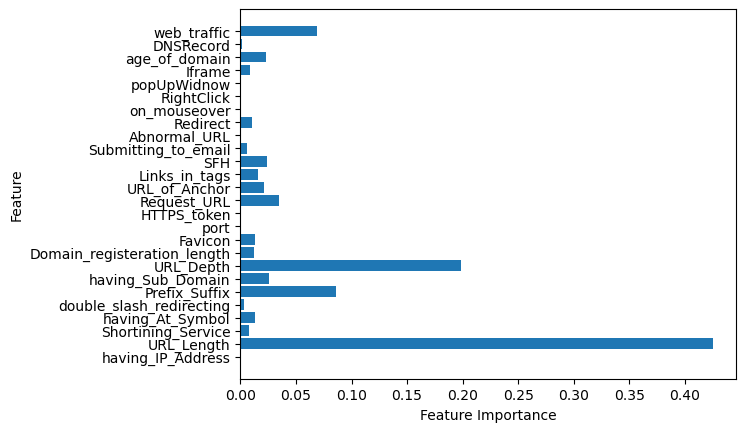

In [67]:
import matplotlib.pyplot as plt
importances = rf_model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

In [68]:
import pickle
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [69]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Define the individual models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Create the Voting Classifier
voting_model = VotingClassifier(
    estimators=[
        ('random_forest', rf_model),
        ('xgboost', xgb_model)
    ],
    voting='soft'  # Use 'soft' for probability-based voting (recommended for ROC-AUC)
)

# Train the Voting Classifier
print("Training Voting Classifier...")
voting_model.fit(X_train, y_train)

# Evaluate the Voting Classifier
print("Voting Classifier Evaluation:")
evaluate_model(voting_model, X_test, y_test)

Training Voting Classifier...


C:\Users\sanket kolte\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Classifier Evaluation:
Accuracy: 0.9804166666666667
Precision: 0.994823123382226
Recall: 0.9656616415410385
F1-Score: 0.9800254993625159
ROC-AUC: 0.9960342758568965
Confusion Matrix:
 [[1200    6]
 [  41 1153]]


In [70]:
import pickle
with open('voting_model.pkl', 'wb') as f:
    pickle.dump(voting_model, f)

In [ ]:
voting_model.predict([])